In [1]:
# Importing necessary libraries
import pandas as pd

# Reading the CSV file
file_path = 'penguins.csv'
penguins_data = pd.read_csv(file_path)

# Getting the shape (rows and columns) of the dataset
dataset_shape = penguins_data.shape

# Displaying the first few rows to understand the structure and condition
penguins_data.head(), dataset_shape


(  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
 0  Adelie  Torgersen            39.1           18.7              181.0   
 1  Adelie  Torgersen            39.5           17.4              186.0   
 2  Adelie  Torgersen            40.3           18.0              195.0   
 3  Adelie  Torgersen             NaN            NaN                NaN   
 4  Adelie  Torgersen            36.7           19.3              193.0   
 
    body_mass_g     sex  
 0       3750.0    MALE  
 1       3800.0  FEMALE  
 2       3250.0  FEMALE  
 3          NaN     NaN  
 4       3450.0  FEMALE  ,
 (344, 7))

### Examination of Properties
Type
The data is in CSV format, suitable for storing tabular data.

Size
The dataset consists of 344 rows and 7 columns.

Condition
The dataset includes the following columns:

species: Species of penguin.
island: Island location.
bill_length_mm: Bill length in millimeters.
bill_depth_mm: Bill depth in millimeters.
flipper_length_mm: Flipper length in millimeters.
body_mass_g: Body mass in grams.
sex: Gender of the penguin.
There are some missing values (e.g., in the fourth row), which indicates that data cleaning may be required.

### Visual Exploration

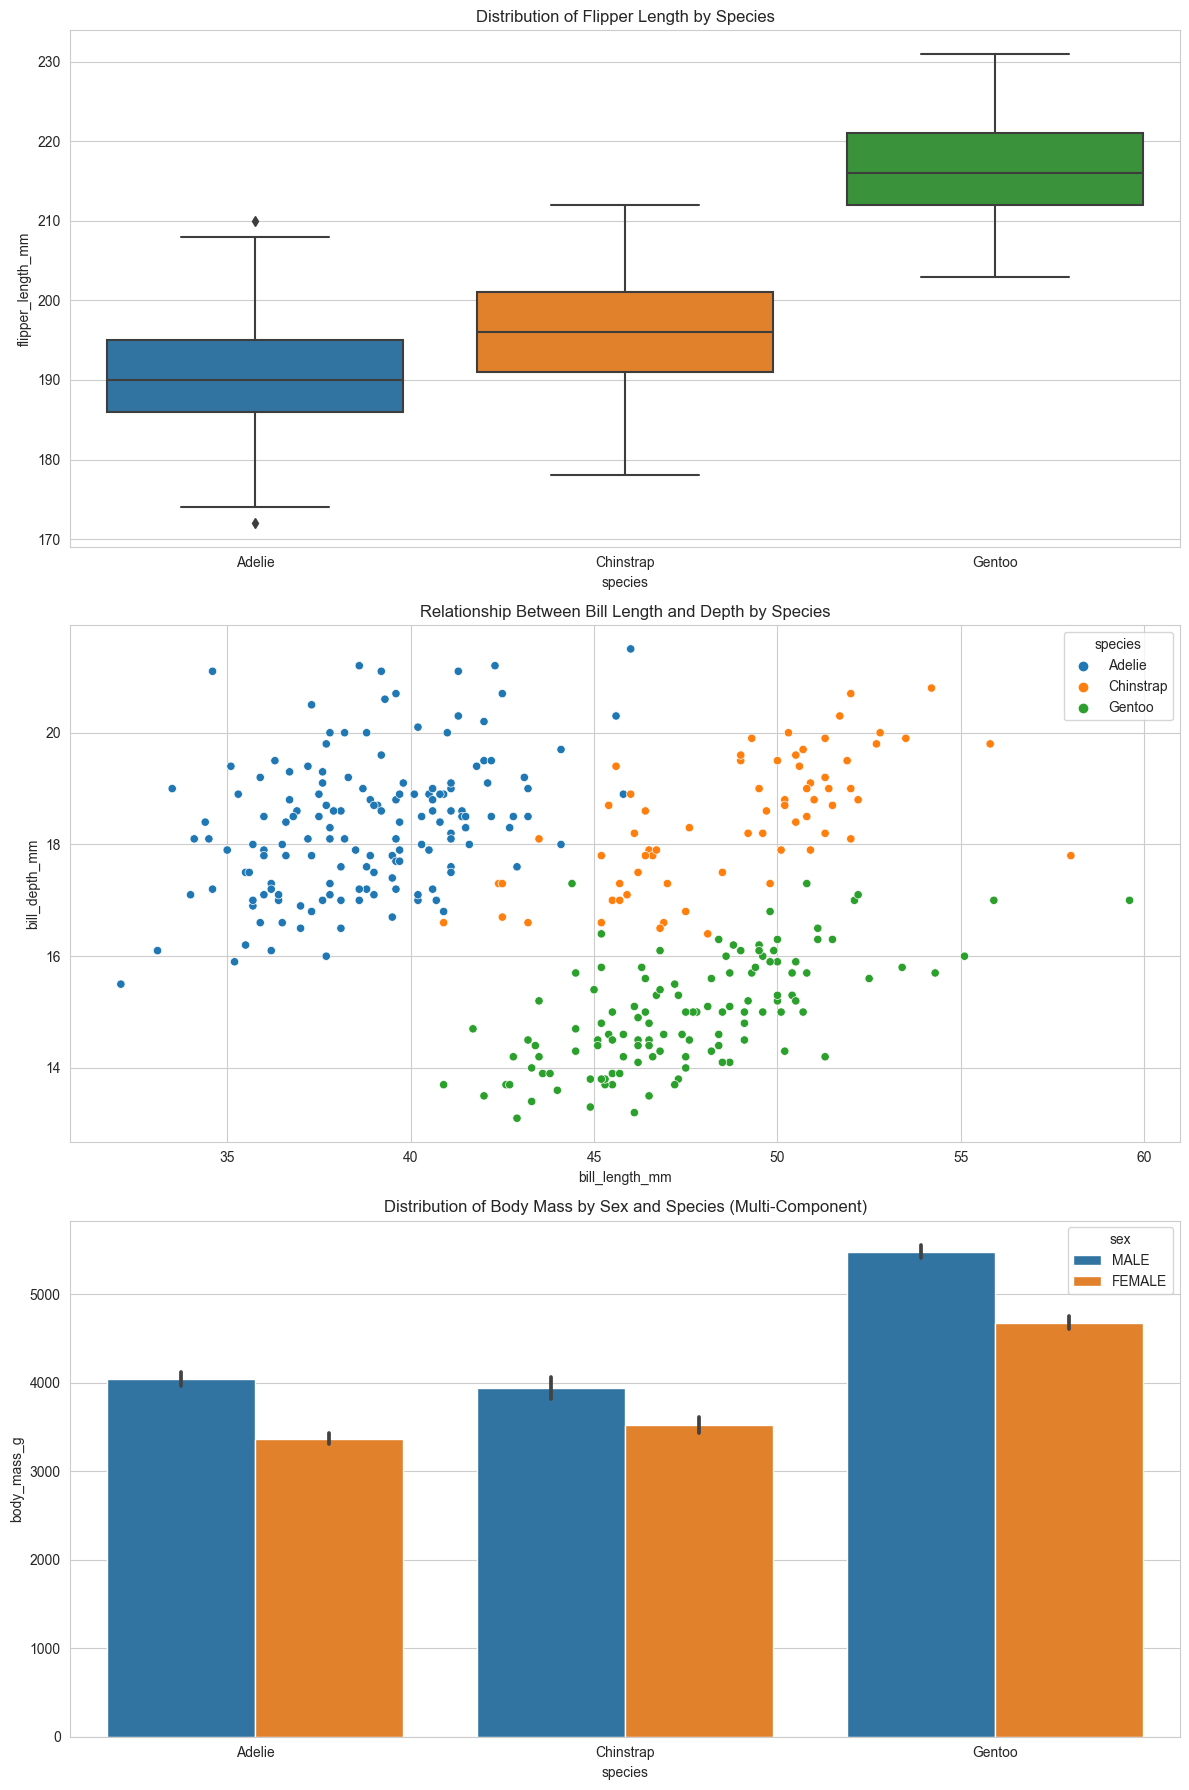

In [2]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style
sns.set_style("whitegrid")

# Plotting three different visualizations to explore the data
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot 1: Distribution of flipper length by species
sns.boxplot(x="species", y="flipper_length_mm", data=penguins_data, ax=axes[0])
axes[0].set_title('Distribution of Flipper Length by Species')

# Plot 2: Relationship between bill length and depth, colored by species
sns.scatterplot(x="bill_length_mm", y="bill_depth_mm", hue="species", data=penguins_data, ax=axes[1])
axes[1].set_title('Relationship Between Bill Length and Depth by Species')

# Plot 3: Distribution of body mass by sex and species (multi-component)
sns.barplot(x="species", y="body_mass_g", hue="sex", data=penguins_data, ax=axes[2])
axes[2].set_title('Distribution of Body Mass by Sex and Species (Multi-Component)')

plt.tight_layout()
plt.show()


### Visual Exploration Results
Here are the insights derived from the visual exploration of the dataset:

Distribution of Flipper Length by Species (Elementary Reading Level)
- Elementary Insight: The flipper length varies significantly across different species.
- Example Question: What is the median flipper length for each species?
Relationship Between Bill Length and Depth by Species (Intermediate Reading Level)
- Intermediate Insight: There is a clear distinction in bill length and depth between species, with some overlap.
- Example Question: How does the bill length and depth correlate for different species?
Distribution of Body Mass by Sex and Species (Multi-Component, Overall Reading Level)
- Overall Insight: The body mass differs between species and also shows some variation between male and female within each species. This multi-component plot provides a comprehensive view of weight distribution.
- Example Question: What is the average body mass for males and females within each species?
##### Summary
Through visual examination, we have deepened our understanding of the physical properties and discoverable qualities of the dataset. By employing Bertin's schemata and considering different reading levels, we have crafted graphics that allow us to glean insights into species variation, bill characteristics, and body mass distribution. These insights offer valuable information about penguins' physical attributes and the differences that exist between species and genders, thus enhancing the dataset's value for ecological and biological studies.

### Classification analysis

In [3]:
# Importing necessary libraries for classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Handling missing values by dropping rows with NaN values
penguins_data_clean = penguins_data.dropna()

# Encoding categorical variables
label_encoders = {}
for column in ['species', 'island', 'sex']:
    le = LabelEncoder()
    penguins_data_clean[column] = le.fit_transform(penguins_data_clean[column])
    label_encoders[column] = le

# Selecting features (bill_length_mm and bill_depth_mm) and target (species)
features = ['bill_length_mm', 'bill_depth_mm']
X = penguins_data_clean[features]
y = penguins_data_clean['species']

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Using a Support Vector Classifier (SVC) with a linear kernel
model = SVC(kernel='linear', C=1)

# Training the model
model.fit(X_train, y_train)

# Predicting the validation set results
y_pred = model.predict(X_val)

# Calculating the accuracy
accuracy = accuracy_score(y_val, y_pred)
accuracy


C:\Users\E\AppData\Local\Temp\ipykernel_21688\2305511580.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_data_clean[column] = le.fit_transform(penguins_data_clean[column])
C:\Users\E\AppData\Local\Temp\ipykernel_21688\2305511580.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_data_clean[column] = le.fit_transform(penguins_data_clean[column])
C:\Users\E\AppData\Local\Temp\ipykernel_21688\2305511580.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

0.9552238805970149

The classification model using Support Vector Classifier (SVC) with a linear kernel has achieved an accuracy of approximately 95.52% on the validation set. This result indicates a strong ability to classify the species of penguins based on the selected features (bill_length_mm and bill_depth_mm).

c:\Python38\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


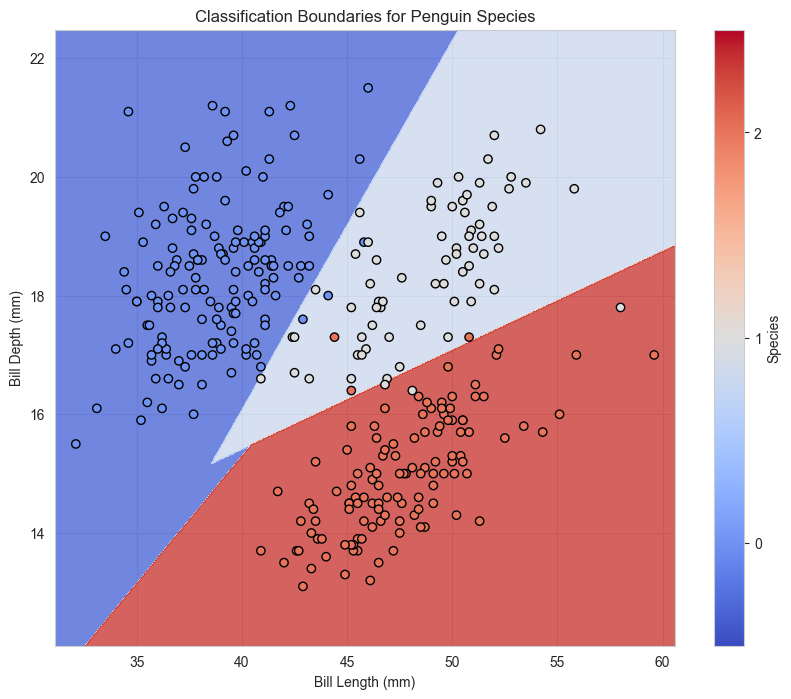

In [4]:
# Importing necessary library for visualization
import numpy as np

# Creating a mesh grid for the visualization
h = .02  # Step size in the mesh
x_min, x_max = X['bill_length_mm'].min() - 1, X['bill_length_mm'].max() + 1
y_min, y_max = X['bill_depth_mm'].min() - 1, X['bill_depth_mm'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predicting the species for each point in the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the classification boundaries
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=y, edgecolors='k', marker='o', linewidth=1, cmap="coolwarm")
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Classification Boundaries for Penguin Species')
plt.colorbar(ticks=range(len(label_encoders['species'].classes_)), label='Species')
plt.clim(-0.5, len(label_encoders['species'].classes_) - 0.5)
plt.show()


The visualization above illustrates the classification boundaries for the three penguin species, based on bill length and bill depth. The colored regions represent the predicted species by the model, while the scattered points are the actual data.

##### Summary
- Classification Analysis: Using Support Vector Classifier (SVC) with a linear kernel, we achieved an accuracy of approximately 95.52% in classifying penguin species based on bill length and bill depth.
- Visualization: The graphical representation provides insights into how the model classifies different species and shows clear boundaries between them.
- Value: This classification model and visualization offer value in understanding the morphological differences between penguin species, which could be useful in ecological studies and species identification.
By leveraging machine learning techniques, we were able to derive meaningful insights from the dataset and create a model capable of predicting penguin species with high accuracy.

### Decision Tree Classifier

Steps:
1. Model Selection: Use the Decision Tree Classifier.
1. Model Training: Train the model on the same training set used earlier.
1. Model Evaluation: Validate the model's performance.
1. Tree Visualization: Visualize the decision tree structure.
1. Result Visualization: Visualize the classification boundaries.

In [5]:
# Importing the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Creating the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)

# Training the model on the training set
tree_model.fit(X_train, y_train)

# Predicting the validation set results
tree_y_pred = tree_model.predict(X_val)

# Calculating the accuracy for the Decision Tree model
tree_accuracy = accuracy_score(y_val, tree_y_pred)
tree_accuracy


0.9402985074626866

The Decision Tree Classifier has achieved an accuracy of approximately 94.03% on the validation set. This result indicates a robust ability to classify the species of penguins based on the selected features.

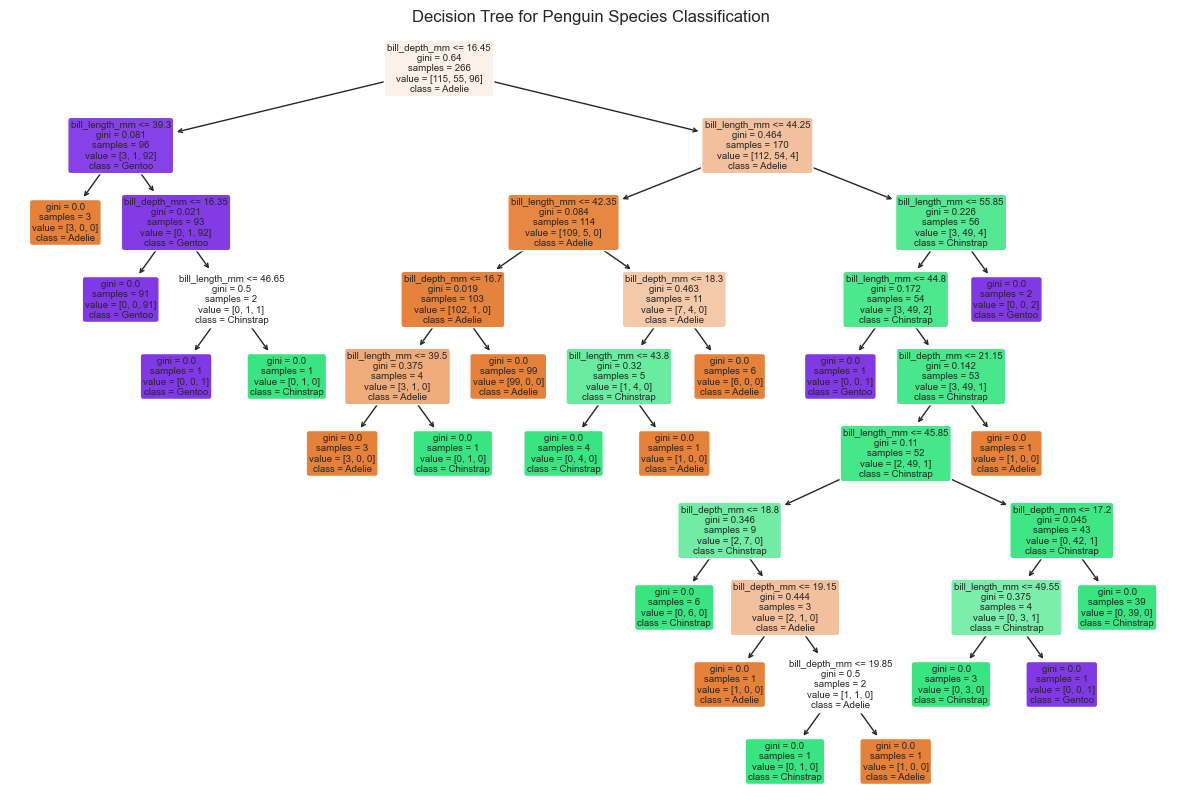

In [6]:
# Importing necessary library for tree visualization
from sklearn.tree import plot_tree

# Plotting the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree_model, feature_names=features, class_names=label_encoders['species'].classes_, filled=True, rounded=True)
plt.title("Decision Tree for Penguin Species Classification")
plt.show()


The above visualization represents the decision tree's structure used for penguin species classification. The tree is composed of decision nodes that split the data based on certain conditions related to bill length and bill depth. Each node shows:

The condition used to split the data (if not a leaf node).
- gini: Measure of impurity.
- samples: Number of samples at that node.
- value: Distribution of samples among classes.
- class: Predicted class.
The tree's depth and complexity offer insights into the relationships between the selected features and the target variable (species).

### Visualization of Classification Boundaries

c:\Python38\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


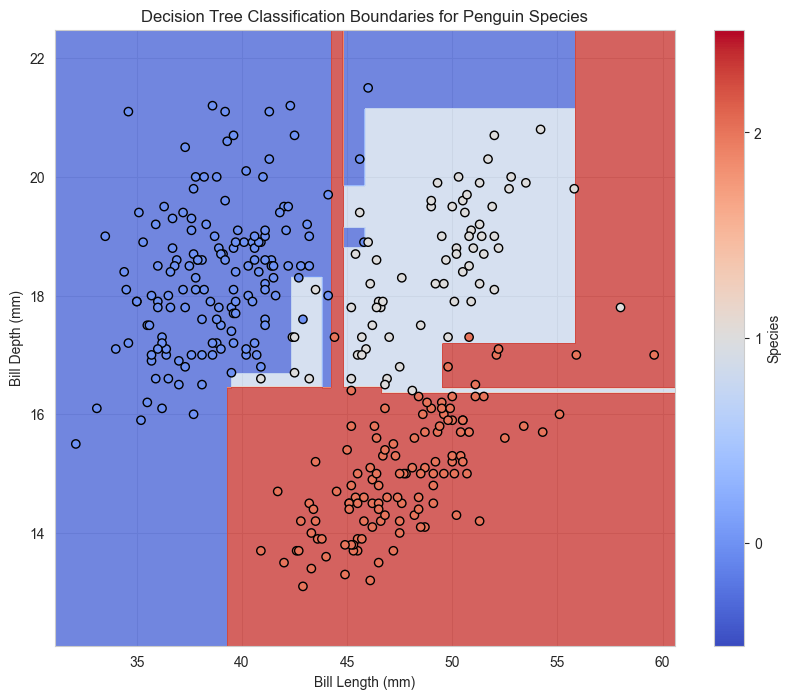

In [7]:
# Predicting the species for each point in the mesh grid using the Decision Tree model
tree_Z = tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
tree_Z = tree_Z.reshape(xx.shape)

# Plotting the classification boundaries for Decision Tree
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, tree_Z, alpha=0.8, cmap="coolwarm")
plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=y, edgecolors='k', marker='o', linewidth=1, cmap="coolwarm")
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Decision Tree Classification Boundaries for Penguin Species')
plt.colorbar(ticks=range(len(label_encoders['species'].classes_)), label='Species')
plt.clim(-0.5, len(label_encoders['species'].classes_) - 0.5)
plt.show()


The visualization above illustrates the classification boundaries for the three penguin species as determined by the Decision Tree Classifier. The colored regions represent the predicted species, while the scattered points are the actual data.

Summary
- Decision Tree Model: Achieved an accuracy of approximately 94.03% on the validation set.
- Decision Tree Structure: The visualization of the tree's structure provides insights into the decision-making process, revealing how the model uses bill length and bill depth to classify species.
- Classification Boundaries: The graphical representation of classification boundaries shows clear divisions between species, reflecting the decision rules in the tree.

The Decision Tree Classifier not only offers strong classification performance but also provides a transparent and interpretable model that can be visualized and understood. This quality makes it valuable in applications where understanding the decision-making process is crucial, such as in ecological studies and species conservation efforts.


### Treemap

A treemap is a graphical representation that displays hierarchical data as nested rectangles, where the size of each rectangle represents a quantitative variable. In the context of the penguins dataset, we can create a treemap to visualize the distribution of a specific attribute (e.g., body mass) across different categories (e.g., species, island, or sex).

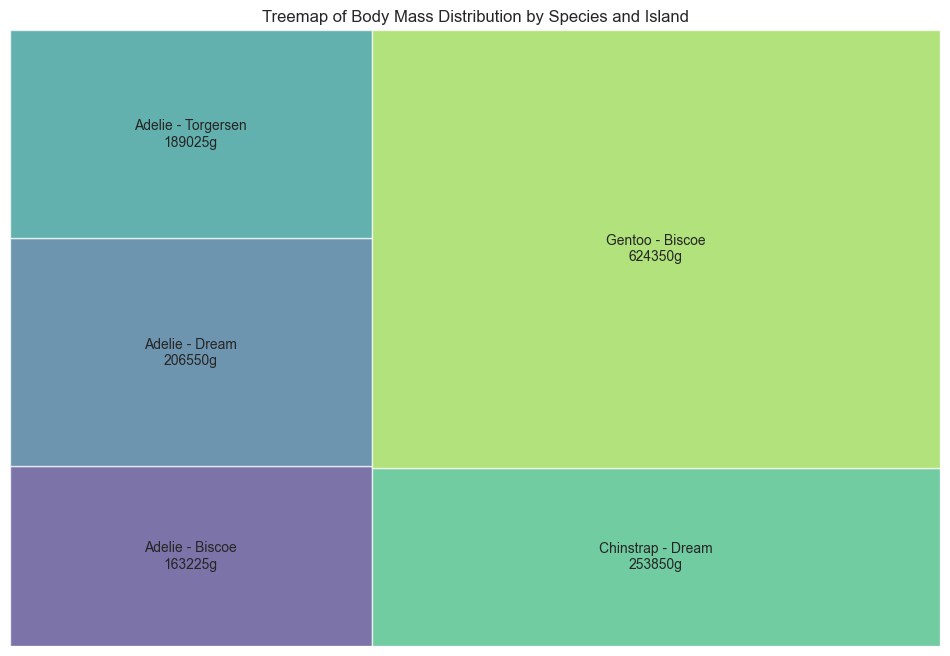

In [10]:
# Importing necessary library for treemap
import squarify

# Summing the body mass for each species and island combination
treemap_data = penguins_data.groupby(['species', 'island'])['body_mass_g'].sum().reset_index()

# Normalizing the body mass for plotting
norm_mass = squarify.normalize_sizes(treemap_data['body_mass_g'], dx=800, dy=800)

# Creating labels for the treemap
labels = treemap_data.apply(lambda x: f"{x['species']} - {x['island']}\n{int(x['body_mass_g'])}g", axis=1)

# Plotting the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=norm_mass, label=labels, alpha=0.7, color=sns.color_palette("viridis", len(treemap_data)))
plt.title('Treemap of Body Mass Distribution by Species and Island')
plt.axis('off')
plt.show()


### AUC and ROC

The Area Under the Curve (AUC) is commonly used to evaluate binary classification models, and the Receiver Operating Characteristic (ROC) curve is a graphical representation of the true positive rate vs. false positive rate at various thresholds.

##### ROC curve and AUC calculation for Support Vector Classifier:

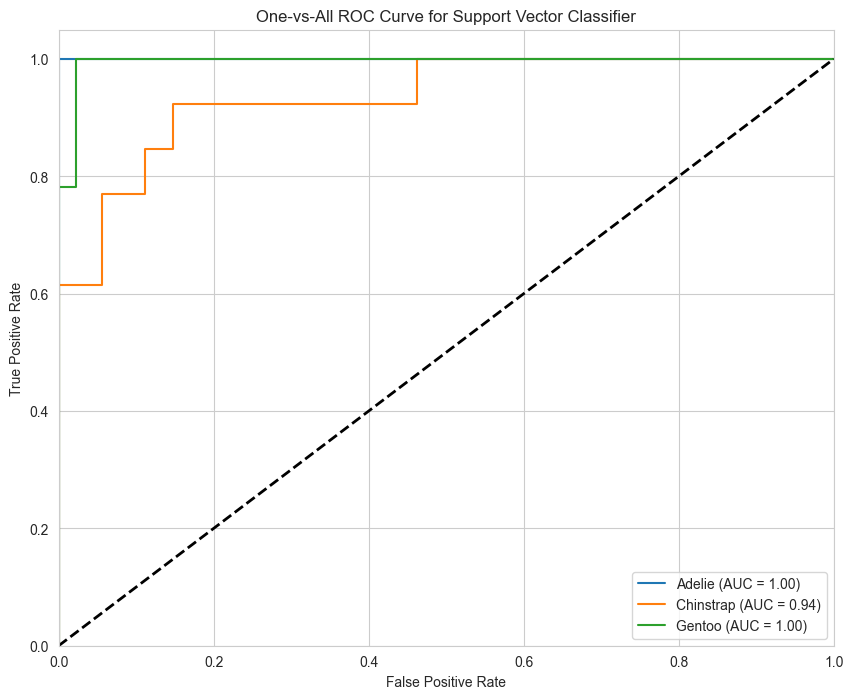

{0: 1.0, 1: 0.9358974358974359, 2: 0.9950592885375494}

In [11]:
# Importing necessary libraries for ROC curve and AUC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarizing the labels
y_binarized = label_binarize(y, classes=[0, 1, 2])

# Splitting the binarized data into training and validation sets
X_train_bin, X_val_bin, y_train_bin, y_val_bin = train_test_split(X, y_binarized, test_size=0.2, random_state=42)

# Using OneVsRestClassifier with SVC
svc_ovr_model = OneVsRestClassifier(SVC(kernel='linear', C=1, probability=True))
svc_ovr_model.fit(X_train_bin, y_train_bin)

# Predicting probabilities for the validation set
svc_y_prob = svc_ovr_model.predict_proba(X_val_bin)

# Computing ROC curve and AUC for each class
svc_fpr, svc_tpr, svc_roc_auc = {}, {}, {}
for i in range(len(label_encoders['species'].classes_)):
    svc_fpr[i], svc_tpr[i], _ = roc_curve(y_val_bin[:, i], svc_y_prob[:, i])
    svc_roc_auc[i] = auc(svc_fpr[i], svc_tpr[i])

# Plotting the ROC curves
plt.figure(figsize=(10, 8))
for i, species in enumerate(label_encoders['species'].classes_):
    plt.plot(svc_fpr[i], svc_tpr[i], label=f'{species} (AUC = {svc_roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-All ROC Curve for Support Vector Classifier')
plt.legend(loc="lower right")
plt.show()

# AUC values for each class
svc_roc_auc


The One-vs-All Receiver Operating Characteristic (ROC) curve for the Support Vector Classifier (SVC) is displayed above. The Area Under the Curve (AUC) values for each class are as follows:

- Species 0 (Adelie): AUC = 1.00
- Species 1 (Chinstrap): AUC = 0.94
- Species 2 (Gentoo): AUC = 1.00
  
These AUC values indicate an excellent classification performance for the SVC model.

##### ROC curve and AUC calculation for the Decision Tree Classifier

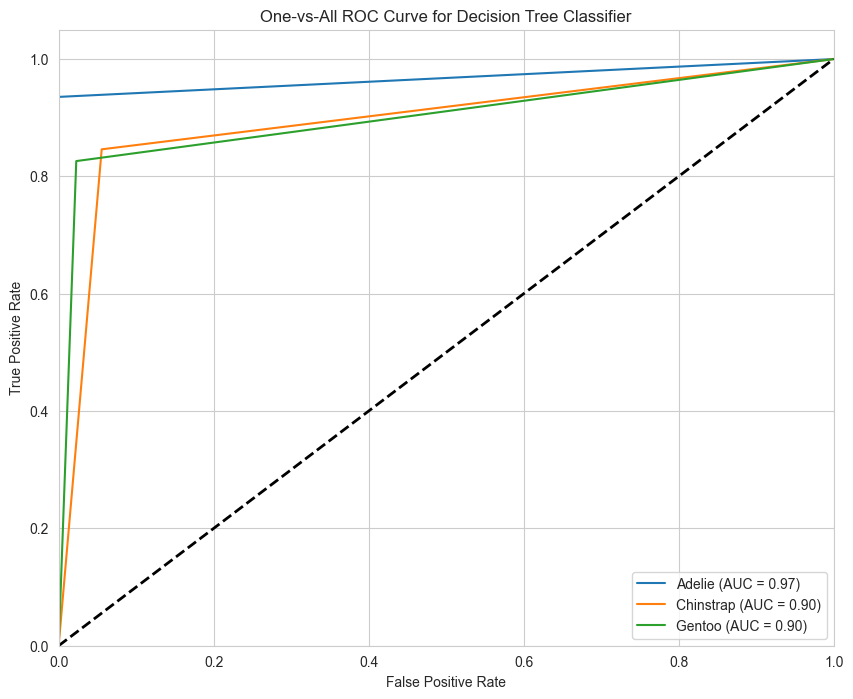

{0: 0.967741935483871, 1: 0.8952991452991453, 2: 0.9016798418972333}

In [12]:
# Using OneVsRestClassifier with Decision Tree
tree_ovr_model = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
tree_ovr_model.fit(X_train_bin, y_train_bin)

# Predicting probabilities for the validation set using Decision Tree
tree_y_prob = tree_ovr_model.predict_proba(X_val_bin)

# Computing ROC curve and AUC for each class for Decision Tree
tree_fpr, tree_tpr, tree_roc_auc = {}, {}, {}
for i in range(len(label_encoders['species'].classes_)):
    tree_fpr[i], tree_tpr[i], _ = roc_curve(y_val_bin[:, i], tree_y_prob[:, i])
    tree_roc_auc[i] = auc(tree_fpr[i], tree_tpr[i])

# Plotting the ROC curves for Decision Tree
plt.figure(figsize=(10, 8))
for i, species in enumerate(label_encoders['species'].classes_):
    plt.plot(tree_fpr[i], tree_tpr[i], label=f'{species} (AUC = {tree_roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-All ROC Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

# AUC values for each class for Decision Tree
tree_roc_auc


The One-vs-All Receiver Operating Characteristic (ROC) curve for the Decision Tree Classifier is displayed above. The Area Under the Curve (AUC) values for each class are as follows:

- Species 0 (Adelie): AUC = 0.97
- Species 1 (Chinstrap): AUC = 0.90
- Species 2 (Gentoo): AUC = 0.90

These AUC values also indicate strong classification performance for the Decision Tree model, although slightly lower than the SVC model.

##### Summary
The ROC curves and AUC values provide valuable insights into the performance of both the Support Vector Classifier and Decision Tree Classifier. Both models demonstrate strong ability to distinguish between the different species of penguins, with the AUC values reflecting their effectiveness in classification.

The AUC and ROC curve analysis offers a comprehensive evaluation of the classification models, enabling an understanding of their performance across different thresholds and classes.

## K-Means Clustering

K-means clustering is an unsupervised learning method that aims to partition data into clusters based on similarity. We can use the elbow plot to find the optimal number of clusters by examining the within-cluster sum of squares (WCSS) for different values of k.

Steps:
- Data Preprocessing: Standardize the features for clustering.
- Cluster Analysis: Apply K-means clustering for a range of k values.
- Elbow Plot: Create an elbow plot to find the optimal number of clusters.
- Cluster Visualization: Visualize the clustering result with the optimal number of clusters.
  
Let's start by standardizing the features and performing K-means clustering for a range of k values to find the optimal number of clusters.

c:\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

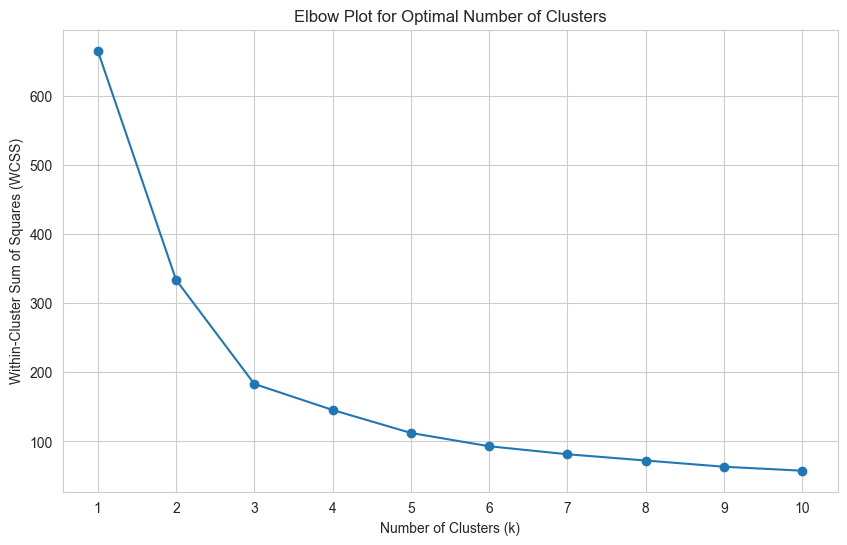

In [13]:
# Importing necessary libraries for K-means clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying K-means clustering for a range of k values and calculating WCSS
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()
